In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from pathlib import PurePath
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from model import *

# import log
#
# log = log.initialise_logging("info")


In [13]:
def plot_losses(losses=[], node='', dataset_name='', figsize=(30, 10)):
  fig, ax = plt.subplots(figsize=figsize)
  for i, loss in enumerate(losses):
    ax.plot(loss, label='Node {} loss'.format(i+1))
    ax.annotate('Node {} loss'.format(i+1), xy=(len(loss), loss[-1:]), xytext=(len(loss), loss[-1:]), arrowprops=dict(facecolor='black', shrink=0.05))
  # ax.legend()
  if node == '':
    ax.set_title('Losses for {} nodes on {}'.format(len(losses), dataset_name))
  else:
    ax.set_title('Losses for nodes {} for {} experiments on {}'.format(node, len(losses), dataset_name))
  ax.set_xlabel('Epochs')
  ax.set_ylabel('Loss')

In [14]:
def plot_losses_comp_exp(ground_truth, losses={}, dataset_name='', figsize=(30, 10)):
  fig, ax = plt.subplots(figsize=figsize)
  ax.plot(ground_truth, label='Ground Truth Model')
  ax.annotate('Ground Truth Model', xy=(len(ground_truth), ground_truth[-1:]), xytext=(len(ground_truth), ground_truth[-1:]), arrowprops=dict(facecolor='black', shrink=0.05))
  for key, loss in losses.items():
    ax.plot(loss, label='Node {} losses'.format(key))
    ax.annotate('Node {} losses'.format(key), xy=(len(loss), loss[-1:]), xytext=(len(loss), loss[-1:]), arrowprops=dict(facecolor='black', shrink=0.05))
  ax.legend()
  ax.set_title('Losses for {} experimental Models {}'.format(len(losses)+1, dataset_name))
  ax.set_xlabel('Epochs')
  ax.set_ylabel('Loss')

In [5]:
def plot_heatmap(threshold, df, figsize=(40, 25), linewidths=.9):
  sns.set (rc = {'figure.figsize':figsize})
  sns.heatmap(df, vmax=threshold, linewidths=linewidths)

In [6]:
exp1 = np.load(PurePath('../results/station_losses/stations_losses-metr-la-ruby-sponge-17.npz'))
exp2 = np.load(PurePath('../results/station_losses/stations_losses-metr-la-snowy-wave-18.npz'))
exp3 = np.load(PurePath('../results/station_losses/stations_losses-metr-la-eager-sea-19.npz'))
exp4 = np.load(PurePath('../results/station_losses/stations_losses-metr-la-fancy-mountain-20.npz'))
exp5 = np.load(PurePath('../results/station_losses/stations_losses-metr-la-expert-puddle-21.npz'))
exp6 = np.load(PurePath('../results/station_losses/stations_losses-metr-la-charmed-sea-22.npz'))

In [7]:
dataset_exp1_train = pd.DataFrame(exp1['train_station_loss'])
dataset_exp2_train = pd.DataFrame(exp2['train_station_loss'])
dataset_exp3_train = pd.DataFrame(exp3['train_station_loss'])
dataset_exp4_train = pd.DataFrame(exp4['train_station_loss'])
dataset_exp5_train = pd.DataFrame(exp5['train_station_loss'])
dataset_exp6_train = pd.DataFrame(exp6['train_station_loss'])

In [8]:
dataset_exp1_valid = pd.DataFrame(exp1['valid_station_loss'])
dataset_exp2_valid = pd.DataFrame(exp2['valid_station_loss'])
dataset_exp3_valid = pd.DataFrame(exp3['valid_station_loss'])
dataset_exp4_valid = pd.DataFrame(exp4['valid_station_loss'])
dataset_exp5_valid = pd.DataFrame(exp5['valid_station_loss'])
dataset_exp6_valid = pd.DataFrame(exp6['valid_station_loss'])

# Plotting losses of all nodes and comparing them with each other

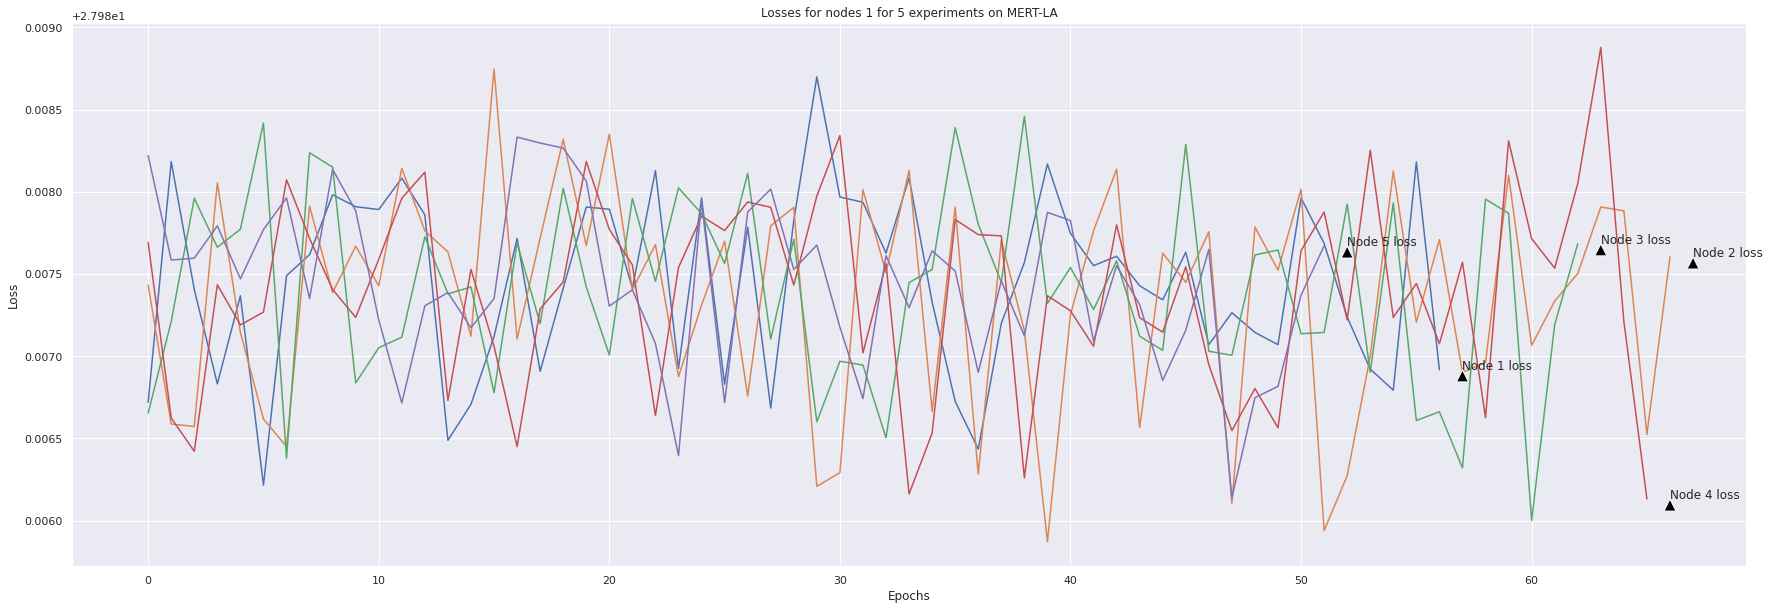

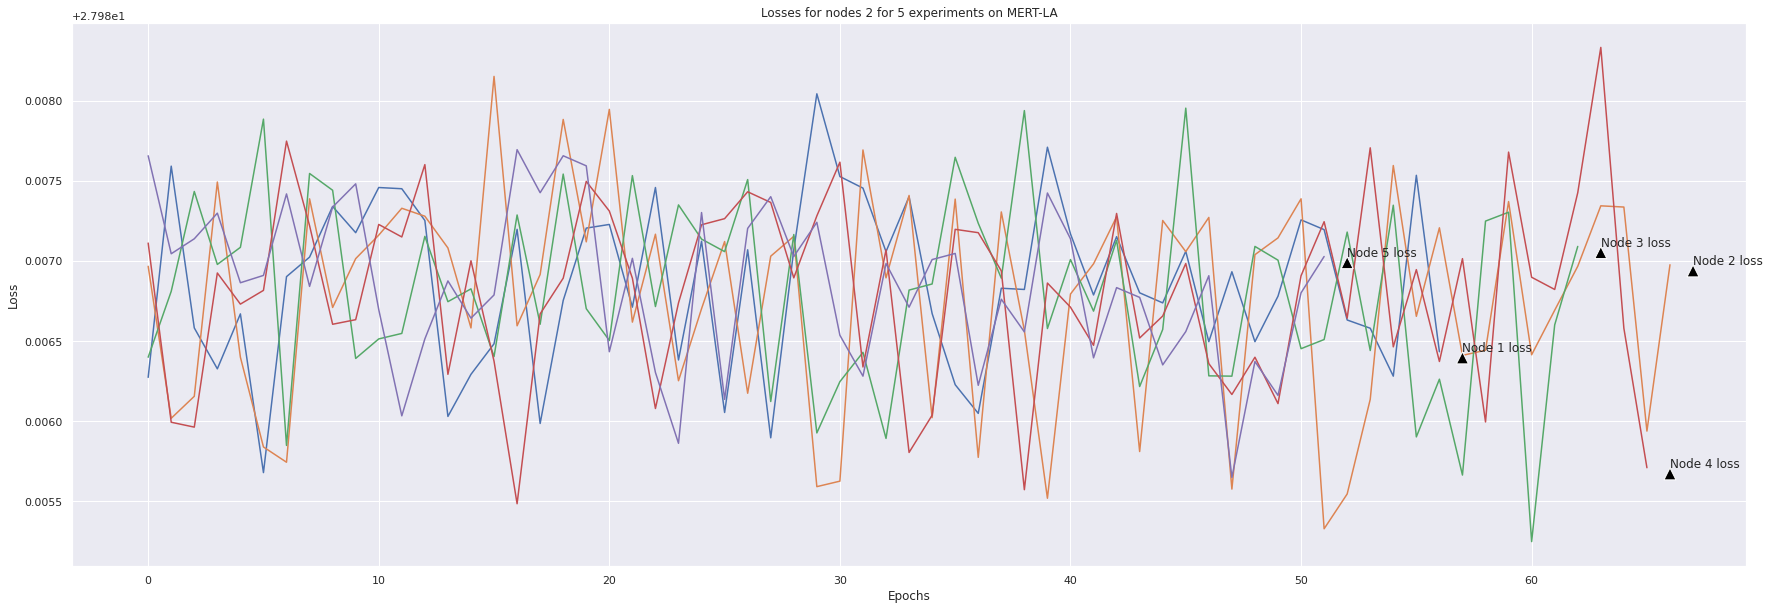

In [15]:
plot_losses([dataset_exp1_train[0],
  dataset_exp2_train[0],
  dataset_exp3_train[0],
  dataset_exp4_train[0],
  dataset_exp5_train[0]], '1', 'MERT-LA')

plot_losses([dataset_exp1_train[1],
  dataset_exp2_train[1],
  dataset_exp3_train[1],
  dataset_exp4_train[1],
  dataset_exp5_train[1]], '2', 'MERT-LA')

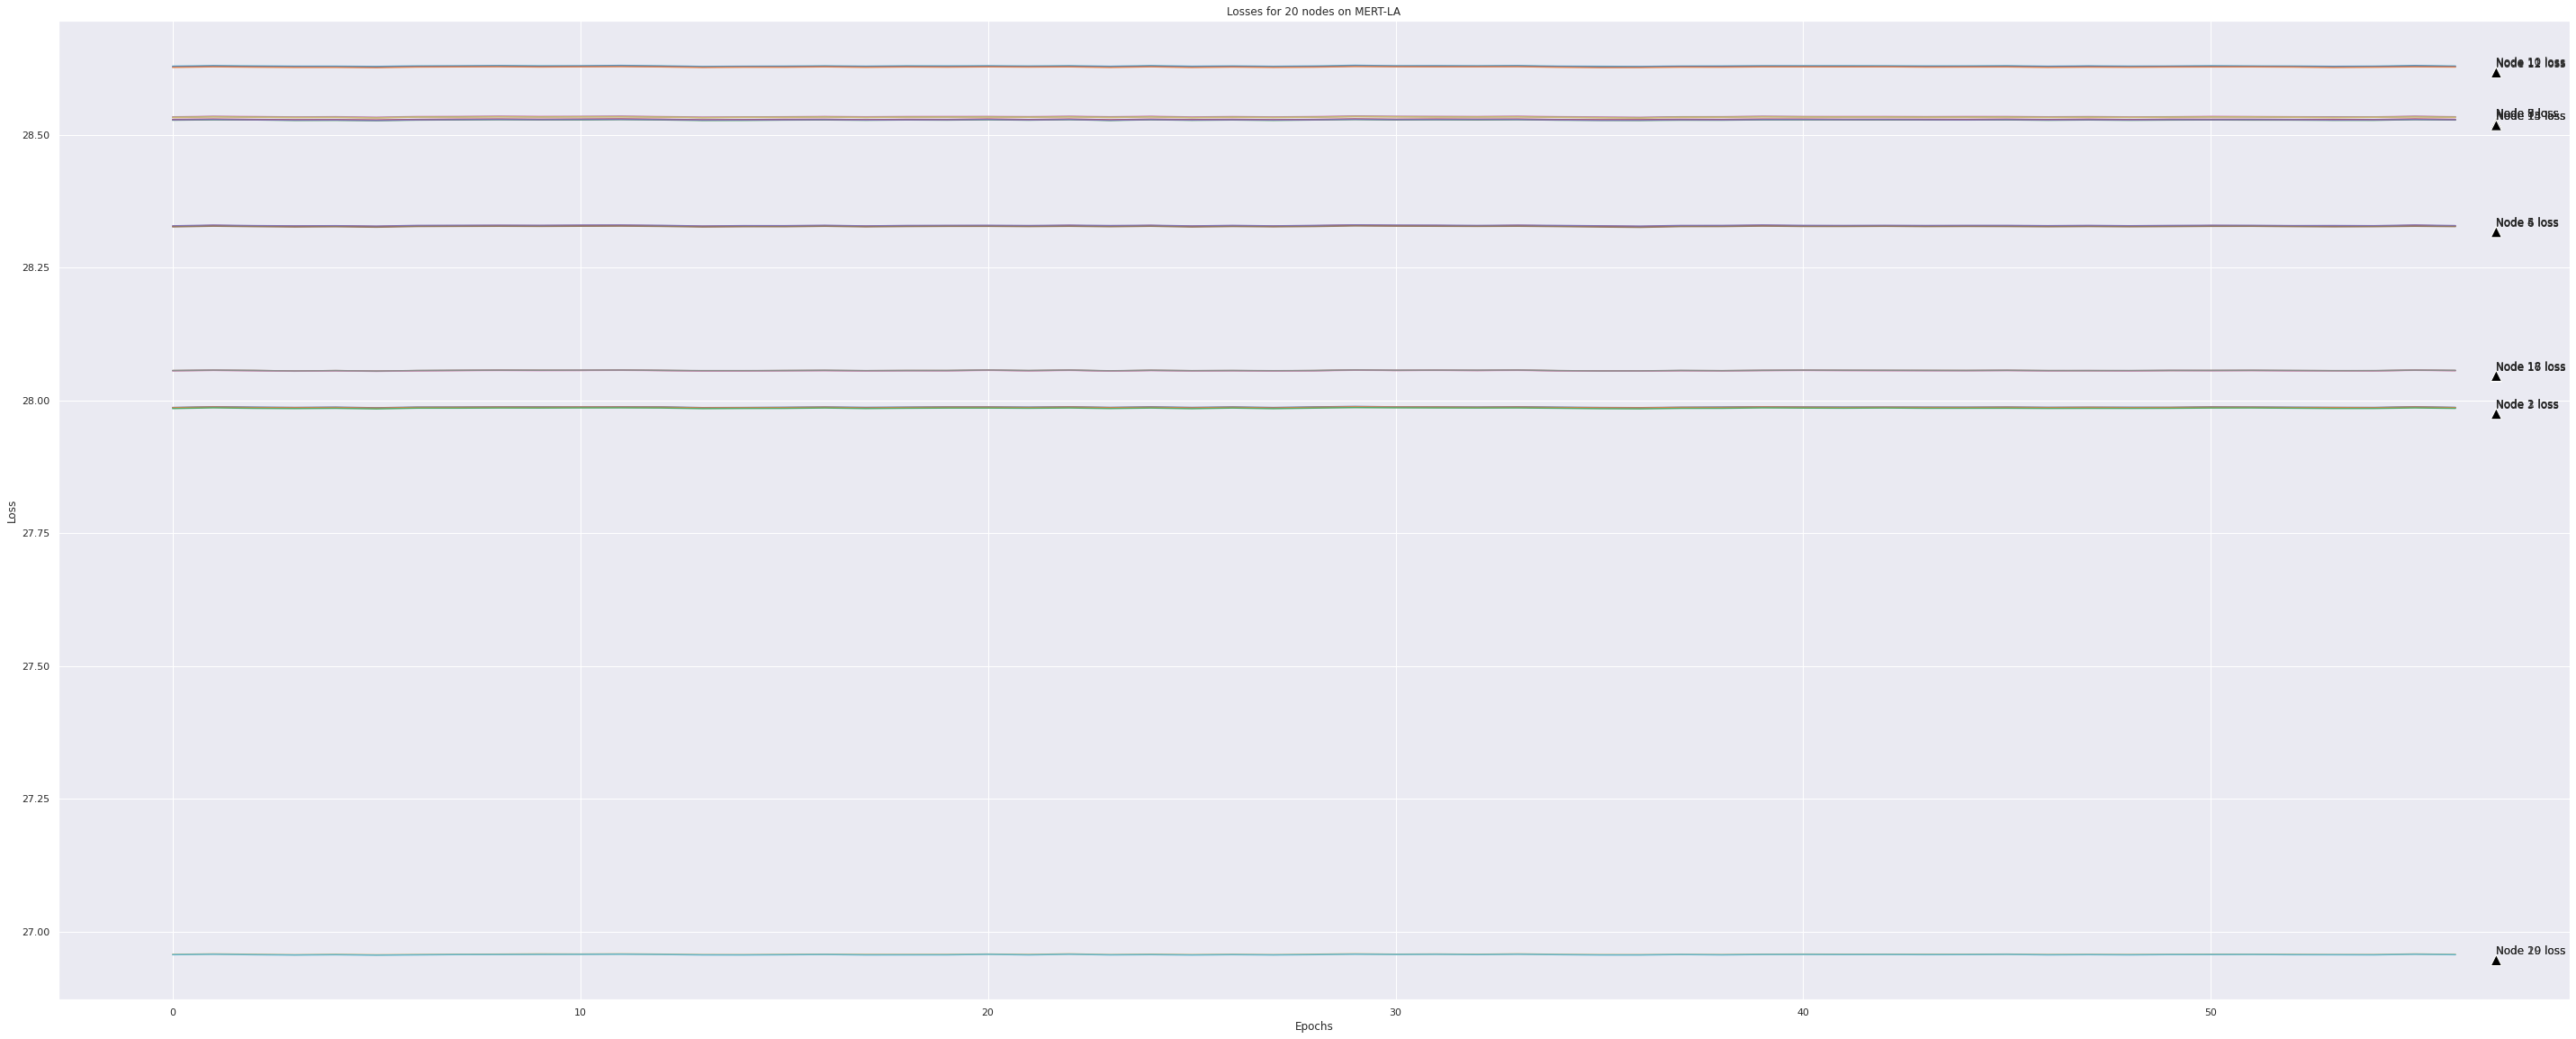

In [16]:
node_range = 20
start_range = 0
end_range = node_range
figsize = (50, 20)
dataset_name = 'MERT-LA'
plot_losses(losses=[dataset_exp1_train.iloc[:, start_range:end_range][i] for i in range(node_range)], dataset_name=dataset_name , figsize=figsize)
# plot_losses(losses=[dataset_exp2_train.iloc[:, start_range:node_range][i] for i in range(node_range)], dataset_name=dataset_name, figsize=figsize)
# plot_losses(losses=[dataset_exp3_train.iloc[:, start_range:node_range][i] for i in range(node_range)], dataset_name=dataset_name, figsize=figsize)
# plot_losses(losses=[dataset_exp4_train.iloc[:, start_range:node_range][i] for i in range(node_range)], dataset_name=dataset_name, figsize=figsize)
# plot_losses(losses=[dataset_exp5_train.iloc[:, start_range:node_range][i] for i in range(node_range)], dataset_name=dataset_name, figsize=figsize)

# Heatmap analysis to view which nodes performed better given a threshold of the min-model in a run

## Analysis of Experiment 1: ruby-sponge-17

In [17]:
train_val_loss_exp1 = pd.read_csv(PurePath('../results/train_val_loss/ruby-sponge-17.csv'))

train_val_loss_exp1.drop(['ruby-sponge-17 - Loss/train__MIN', 'ruby-sponge-17 - Loss/train__MAX', 'ruby-sponge-17 - Loss/validation__MIN','ruby-sponge-17 - Loss/validation__MAX'], axis=1, inplace=True)
train_val_loss_exp1.rename(columns = {'ruby-sponge-17 - Loss/train':'train_loss', 'ruby-sponge-17 - Loss/validation':'val_loss'}, inplace = True)
train_val_loss_exp1.set_index('Step', inplace=True)

exp1_threshold = train_val_loss_exp1.train_loss.min()

In [18]:
train_val_loss_exp1.describe()

,train_loss,val_loss
count,57.000000,57.000000
mean,2.899564,2.821777
std,0.203061,0.127128
min,2.733862,2.730635
25%,2.771949,2.749274
50%,2.826526,2.772755
75%,2.934471,2.827243
max,3.791825,3.327983


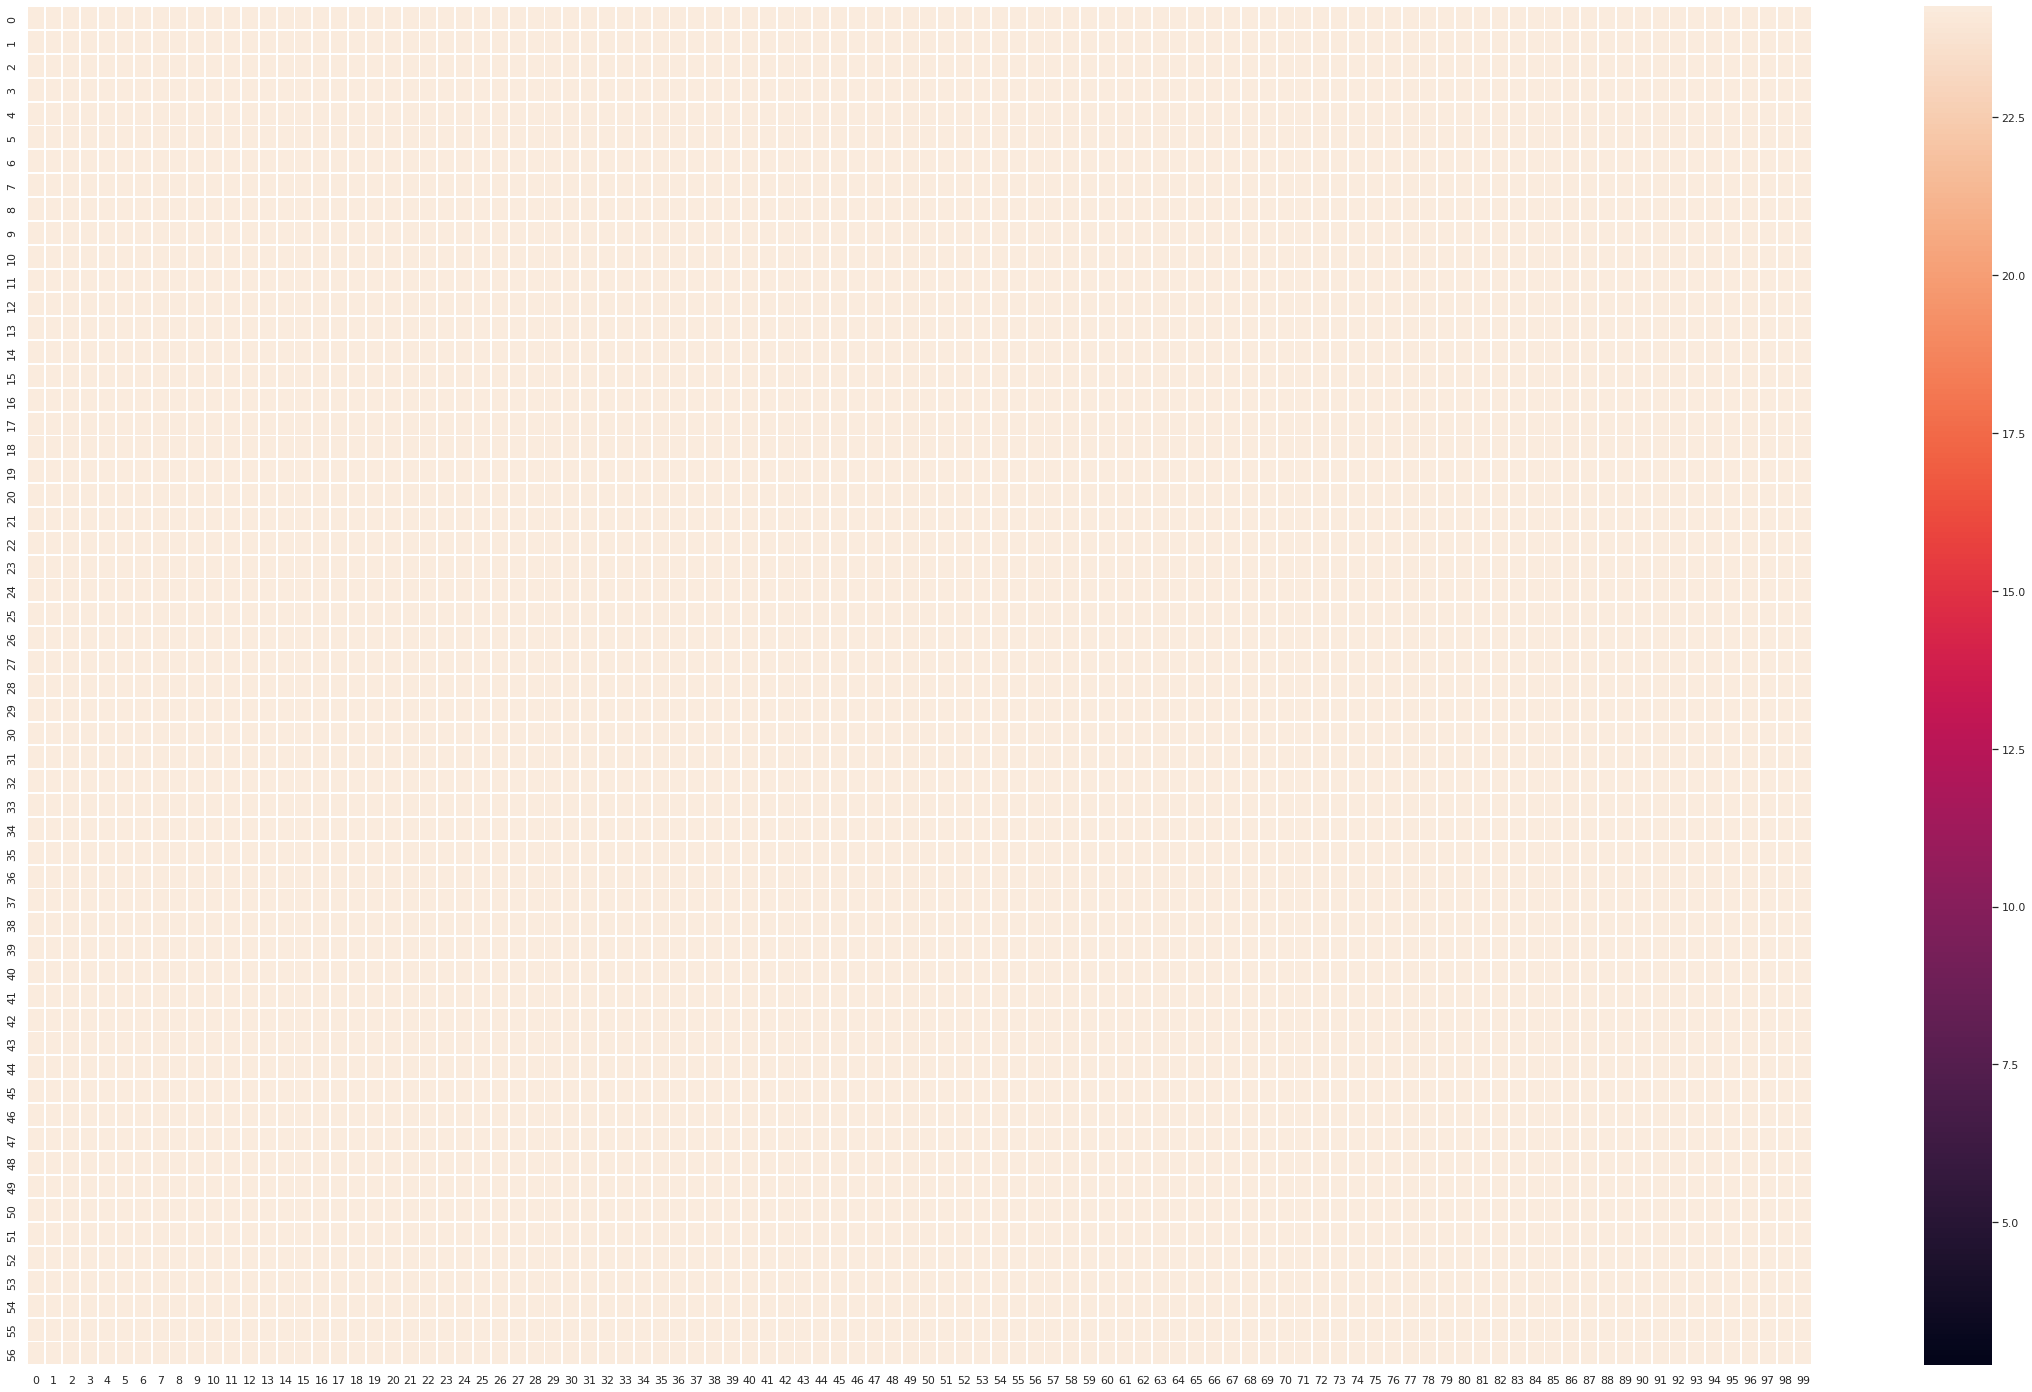

In [19]:
plot_heatmap(exp1_threshold, dataset_exp1_train.iloc[ :, :100])

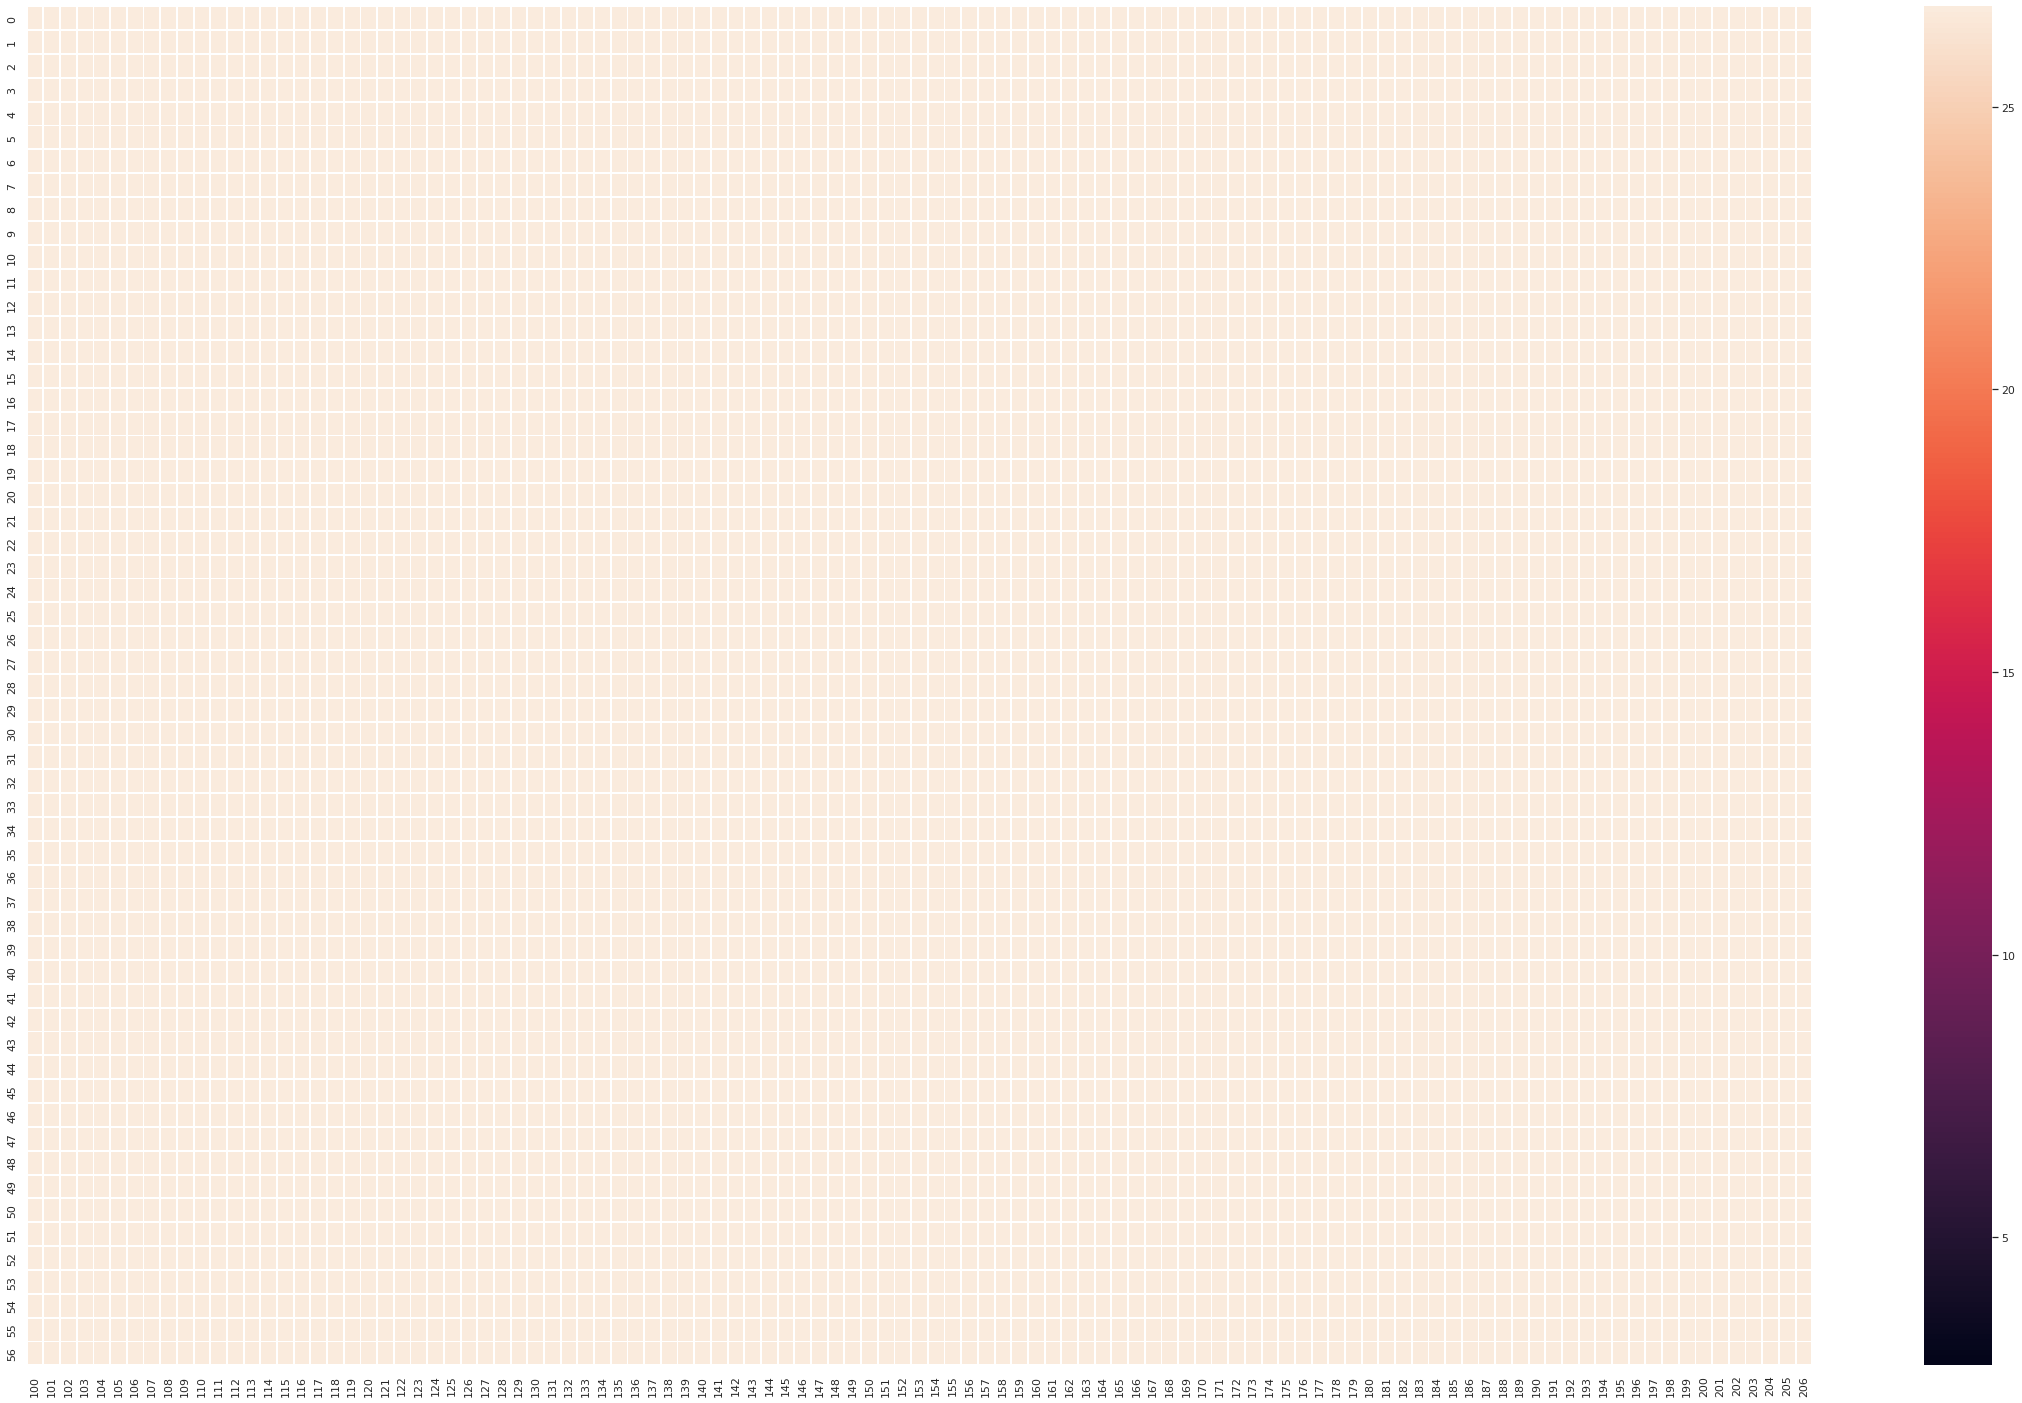

In [20]:
plot_heatmap(exp1_threshold, dataset_exp1_train.iloc[ :, 100:])

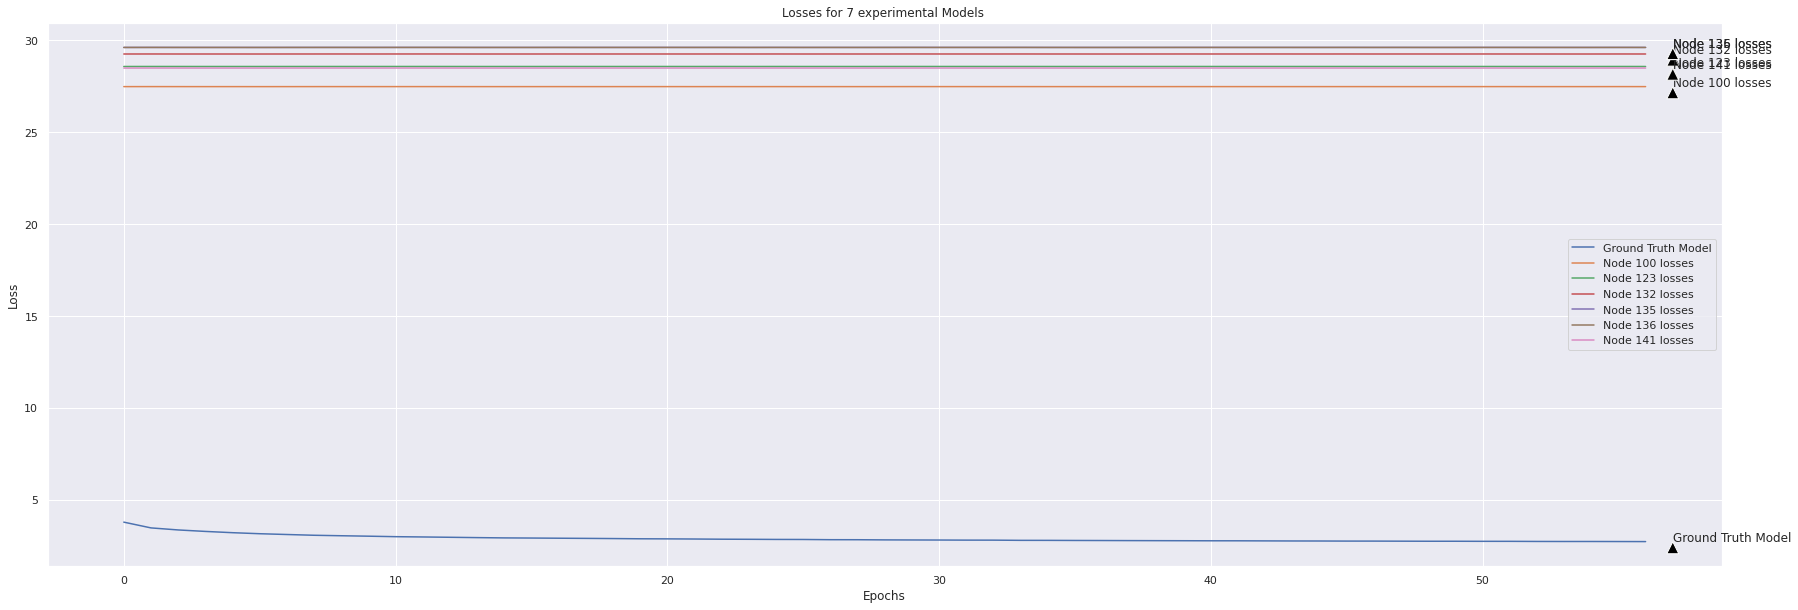

In [21]:
plot_losses_comp_exp(train_val_loss_exp1.train_loss, {'100': dataset_exp1_train[100], '123': dataset_exp1_train[123], '132': dataset_exp1_train[132], '135':dataset_exp1_train[135], '136':dataset_exp1_train[136], '141': dataset_exp1_train[141]})

## Analysis of Experiment 2: fine-river-25

In [ ]:
train_val_loss_exp2 = pd.read_csv(PurePath('../results/train_val_loss/fine-river-25.csv'))

train_val_loss_exp2.drop(['fine-river-25 - Loss/train__MIN', 'fine-river-25 - Loss/train__MAX', 'fine-river-25 - Loss/validation__MIN','fine-river-25 - Loss/validation__MAX'], axis=1, inplace=True)
train_val_loss_exp2.rename(columns = {'fine-river-25 - Loss/train':'train_loss', 'fine-river-25 - Loss/validation':'val_loss'}, inplace = True)
train_val_loss_exp2.set_index('Step', inplace=True)

exp2_threshold = train_val_loss_exp2.train_loss.min()

In [ ]:
train_val_loss_exp2.describe()

In [ ]:
plot_heatmap(exp2_threshold, dataset_exp2_train.iloc[ :, :100])

In [ ]:
plot_heatmap(exp2_threshold, dataset_exp2_train.iloc[ :, 100:])

In [ ]:
plot_losses_comp_exp(train_val_loss_exp2.train_loss, {'87': dataset_exp2_train[87],'100': dataset_exp2_train[100], '123': dataset_exp2_train[123], '132': dataset_exp2_train[132], '135':dataset_exp2_train[135], '136':dataset_exp2_train[136], '141': dataset_exp2_train[141]})

## Analysis of Experiment 6: vibrant-lake-26

In [ ]:
train_val_loss_exp3 = pd.read_csv(PurePath('../results/train_val_loss/vibrant-lake-26.csv'))

train_val_loss_exp3.drop(['vibrant-lake-26 - Loss/train__MIN', 'vibrant-lake-26 - Loss/train__MAX', 'vibrant-lake-26 - Loss/validation__MIN','vibrant-lake-26 - Loss/validation__MAX'], axis=1, inplace=True)
train_val_loss_exp3.rename(columns = {'vibrant-lake-26 - Loss/train':'train_loss', 'vibrant-lake-26 - Loss/validation':'val_loss'}, inplace = True)
train_val_loss_exp3.set_index('Step', inplace=True)

exp3_threshold = train_val_loss_exp3.train_loss.min()


In [ ]:
train_val_loss_exp3.describe()

In [ ]:
plot_heatmap(exp3_threshold, dataset_exp3_train.iloc[ :, :100])

In [ ]:
plot_heatmap(exp3_threshold, dataset_exp3_train.iloc[ :, 100:])

In [ ]:
plot_losses_comp_exp(train_val_loss_exp3.train_loss, {'87': dataset_exp3_train[87],'100': dataset_exp3_train[100], '123': dataset_exp3_train[123], '132': dataset_exp3_train[132], '135':dataset_exp3_train[135], '136':dataset_exp3_train[136], '141': dataset_exp3_train[141]})

# Result Anaylsis

##### 1. Across multiple runs the models perform consistently as seen by the line plots and heatmap
##### 2. A further investigation shall need to be done with the relationship between the best perform nodes and also why other nodes perfrom more poorly(Plot Map of findings)